In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df.sample(5)
df.shape

(5572, 5)

In [4]:
#Data cleaning (drop last 3 columns becoz they contain less info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [7]:
#convert ham value into numeric data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['target']=encoder.fit_transform(df['target'])


In [9]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().sum()

403

In [12]:
#there are 403 duplicates to be removed keeping only the first copies
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

In [15]:
#Exploratory data analysis
#to explain how many ham and how many spam columns are there in our data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

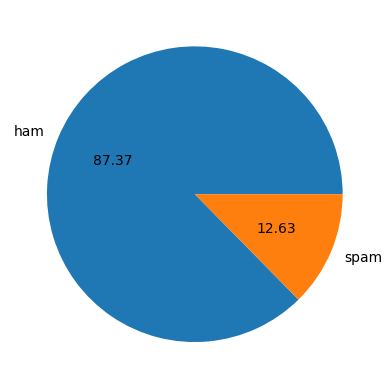

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
#create 3 extra columns to define number of words,sentences and letters
import nltk

In [18]:
!pip install nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_chars']=df['text'].apply(len)

In [21]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#describe the data
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==0][['num_chars','num_words','num_sent']].describe() #description of ham data

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['num_chars','num_words','num_sent']].describe() #description of spam data

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<Axes: ylabel='Count'>

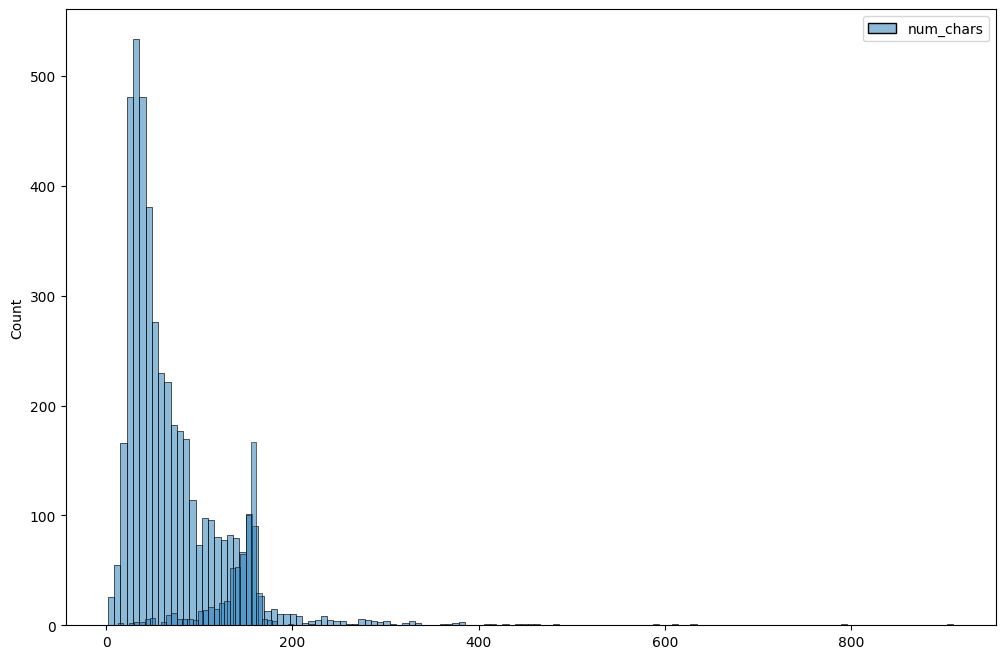

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0][['num_chars']])
sns.histplot(df[df['target']==1][['num_chars']],color='red')

<Axes: ylabel='Count'>

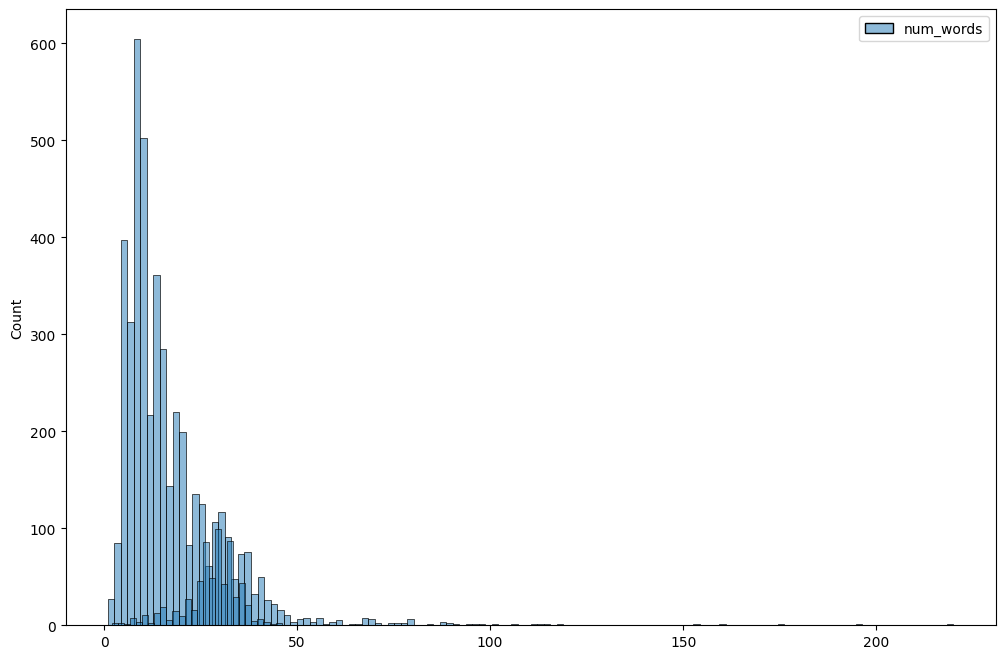

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0][['num_words']])
sns.histplot(df[df['target']==1][['num_words']],color='red')

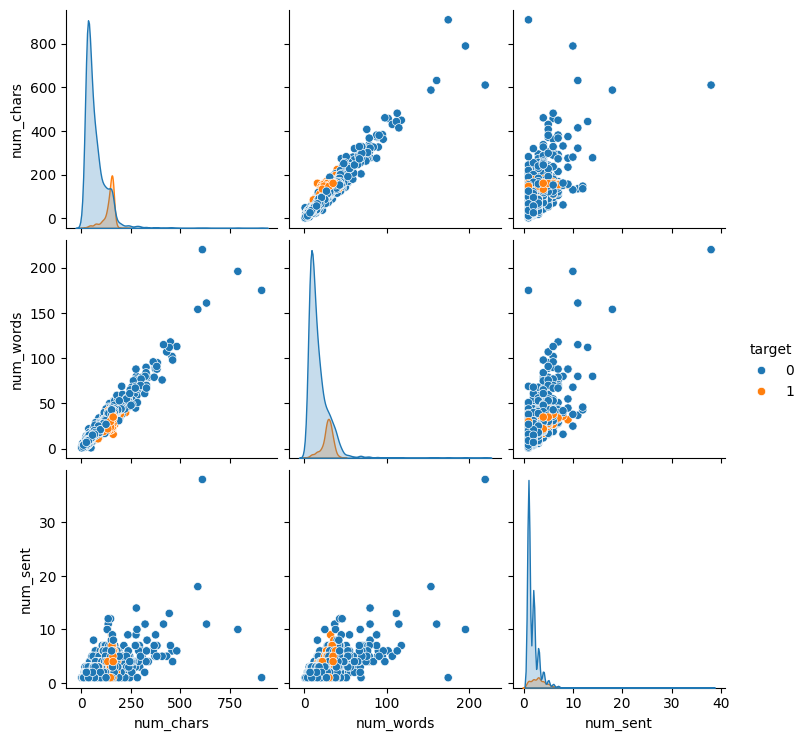

In [30]:
sns.pairplot(df,hue='target')

In [31]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

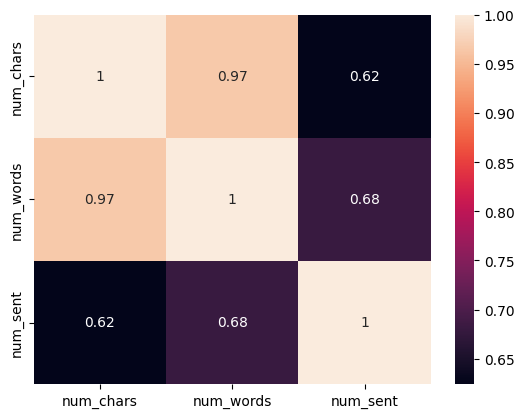

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)


In [33]:
#DATA PREPROCESSING STEPS :
#1.LOWER CASE
#2.TOKENIZATION
#3.SPECIAL CHARACTER REMOVAL
#4.REMOVE PUNCTUATION
#5.STEMMING (DANCE DANCING DANCED GETS CONVERTED INTO DANCE)

In [40]:
def text_transfer(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    final=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            final.append(i)
            

    final1=[]
    for i in final:
        final1.append(ps.stem(i))
    return " ".join(final1)

In [41]:
# text_transfer('Hi How ARE you meghana#?...$$$')
text_transfer('hey meghna did u like my presentation')

'hey meghna u like present'

In [36]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [42]:
df['transformed_text']=df['text'].apply(text_transfer)

In [43]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
!pip install wordcloud

# from wordcloud import WordCloud
# wc=WordCloud(width=500,height=500,min_font_size=10,color='white')

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')



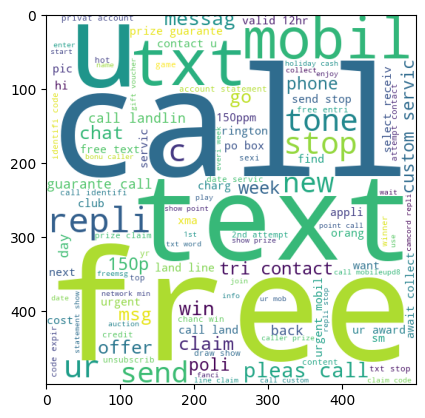

In [46]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
                    

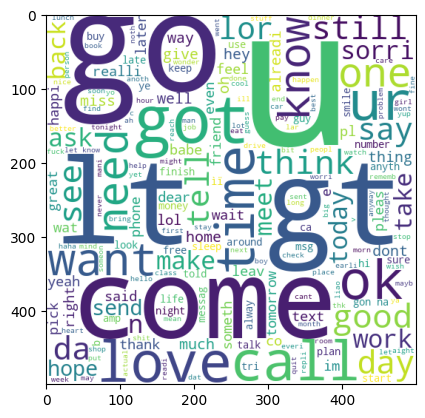

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
                    

In [48]:
spam_msg=[]

for msgs in df[df['target']==1]['transformed_text'].tolist():
    for word in msgs.split():
        spam_msg.append(word)
    

In [49]:
len(spam_msg)

9939

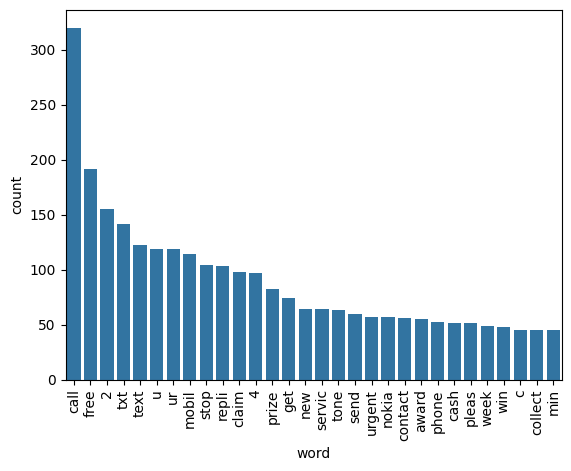

In [50]:
from collections import Counter
spam_counter = Counter(spam_msg).most_common(30)

df_spam = pd.DataFrame(spam_counter, columns=['word', 'count'])

# Plotting the barplot
sns.barplot(x='word', y='count', data=df_spam)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_msg=[]

for msgs in df[df['target']==0]['transformed_text'].tolist():
    for word in msgs.split():
        ham_msg.append(word)

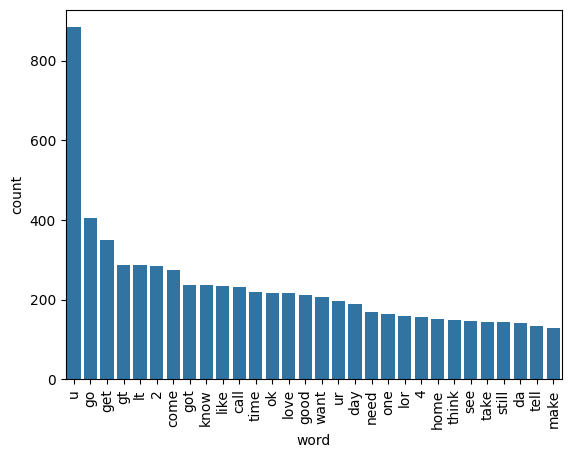

In [52]:
ham_counter = Counter(ham_msg).most_common(30)

df_ham = pd.DataFrame(ham_counter, columns=['word', 'count'])

# Plotting the barplot
sns.barplot(x='word', y='count', data=df_ham)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#to get better result over textual data v use naive bayes but will also compare results of dif algo
#for naive bayes v need numeric input data but v have textual soo v will convert them by using vectorization using bag of words technique
#it creates list of most used words and there frequencies

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()  # Ensure this is initialized


In [54]:
X = cv.fit_transform(df['transformed_text'].values).toarray()


In [55]:
X.shape

(5169, 6708)

In [56]:
y=df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gb=GaussianNB()
mb=MultinomialNB()
bn=BernoulliNB()

In [61]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [62]:
mb.fit(X_train,y_train)
y_pred1=mb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [63]:
bn.fit(X_train,y_train)
y_pred2=bn.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [64]:
#another model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#consider multinomialNB becoz the prediction score is 1 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\nidhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [76]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [77]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


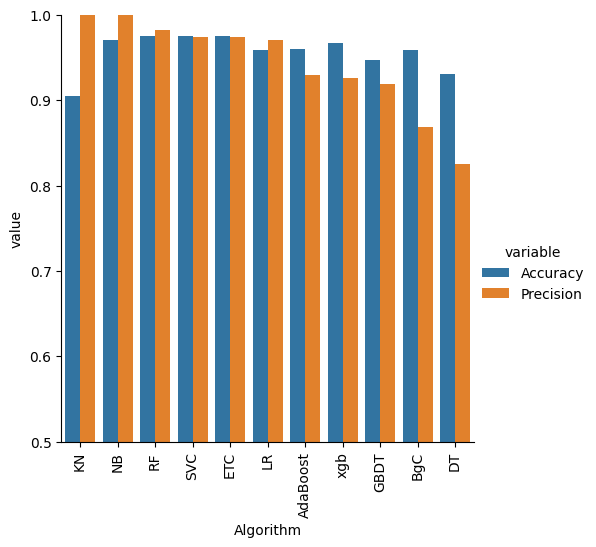

In [78]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf(to select 3k words which r most commonly used in msg)

In [79]:
pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [80]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [81]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [82]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [84]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))